aim: Get snp200 stock for australia, create returns metrics and sort them. Long the top decile and short the bottom decile. Make it intra-day too

In [2]:
%load_ext autoreload
%autoreload 2
from base_model_backtest import backtest

In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import sys
sys.path.append('C:/Users/Billy/Documents/PRISMO/Backtester')
from base_model_backtest import backtest
import datetime
import os
from tqdm import tqdm_notebook
import time
import numpy as np
import pickle
from itertools import compress
import matplotlib.pyplot as plt

In [10]:
tick = pd.read_csv('C:/Users/Billy/Documents/PRISMO/data/nasdaq-100.csv')

In [14]:
tickers = list(tick.Ticker)

In [44]:


asxTickers = pd.read_csv('C:/Users/Billy/Documents/PRISMO/docs/20190901-asx200.csv')

In [47]:
asxTickers = list(asxTickers['S&P/ASX 200 Index (1 September 2019)'][1:])

In [48]:
asxTickers

['ABP',
 'ABC',
 'APT',
 'AGL',
 'ALQ',
 'ALU',
 'AWC',
 'AMC',
 'AMP',
 'ANN',
 'ANZ',
 'APA',
 'APX',
 'ARB',
 'ALG',
 'ALL',
 'ASX',
 'ALX',
 'AZJ',
 'ASL',
 'AST',
 'ASB',
 'API',
 'AOG',
 'BOQ',
 'BAP',
 'BPT',
 'BGA',
 'BAL',
 'BEN',
 'BHP',
 'BIN',
 'BKL',
 'BSL',
 'BLD',
 'BXB',
 'BVS',
 'BRG',
 'BKW',
 'BWP',
 'CTX',
 'CAR',
 'CGF',
 'CHC',
 'CQR',
 'CNU',
 'CLW',
 'CIM',
 'CWY',
 'CUV',
 'CCL',
 'COH',
 'COL',
 'CBA',
 'CPU',
 'COE',
 'CTD',
 'CGC',
 'CCP',
 'CMW',
 'CWN',
 'CSL',
 'CSR',
 'CYB',
 'DXS',
 'DHG',
 'DMP',
 'DOW',
 'ECX',
 'ELD',
 'EHL',
 'EHE',
 'EVN',
 'FPH',
 'FBU',
 'FLT',
 'FMG',
 'GUD',
 'GEM',
 'GXY',
 'GMG',
 'GPT',
 'GNC',
 'GOZ',
 'GWA',
 'HVN',
 'HLS',
 'HUB',
 'IEL',
 'ILU',
 'IPL',
 'IGO',
 'ING',
 'IAG',
 'IVC',
 'IFL',
 'IPH',
 'IRE',
 'JHG',
 'JBH',
 'A2M',
 'JHX',
 'LLC',
 'LNK',
 'LYC',
 'MFG',
 'MGR',
 'MIN',
 'MMS',
 'MND',
 'MPL',
 'MQG',
 'MTS',
 'MYX',
 'NAB',
 'NAN',
 'NCM',
 'NEA',
 'NEC',
 'NHC',
 'NHF',
 'NSR',
 'NST',
 'NUF',
 'NWH',


In [113]:
indexes = pd.MultiIndex.from_product([asxTickers, ['Open','High','Low','Close','Adj Open','Adj High','Adj Low','Adj Close']])


In [114]:
df_all = pd.DataFrame(columns = indexes)


In [121]:
df_all

Empty DataFrame
Columns: [(ABP, Open), (ABP, High), (ABP, Low), (ABP, Close), (ABP, Adj Open), (ABP, Adj High), (ABP, Adj Low), (ABP, Adj Close), (ABC, Open), (ABC, High), (ABC, Low), (ABC, Close), (ABC, Adj Open), (ABC, Adj High), (ABC, Adj Low), (ABC, Adj Close), (APT, Open), (APT, High), (APT, Low), (APT, Close), (APT, Adj Open), (APT, Adj High), (APT, Adj Low), (APT, Adj Close), (AGL, Open), (AGL, High), (AGL, Low), (AGL, Close), (AGL, Adj Open), (AGL, Adj High), (AGL, Adj Low), (AGL, Adj Close), (ALQ, Open), (ALQ, High), (ALQ, Low), (ALQ, Close), (ALQ, Adj Open), (ALQ, Adj High), (ALQ, Adj Low), (ALQ, Adj Close), (ALU, Open), (ALU, High), (ALU, Low), (ALU, Close), (ALU, Adj Open), (ALU, Adj High), (ALU, Adj Low), (ALU, Adj Close), (AWC, Open), (AWC, High), (AWC, Low), (AWC, Close), (AWC, Adj Open), (AWC, Adj High), (AWC, Adj Low), (AWC, Adj Close), (AMC, Open), (AMC, High), (AMC, Low), (AMC, Close), (AMC, Adj Open), (AMC, Adj High), (AMC, Adj Low), (AMC, Adj Close), (AMP, Open), (AMP, High), (AMP, Low), (AMP, Close), (AMP, Adj Open), (AMP, Adj High), (AMP, Adj Low), (AMP, Adj Close), (ANN, Open), (ANN, High), (ANN, Low), (ANN, Close), (ANN, Adj Open), (ANN, Adj High), (ANN, Adj Low), (ANN, Adj Close), (ANZ, Open), (ANZ, High), (ANZ, Low), (ANZ, Close), (ANZ, Adj Open), (ANZ, Adj High), (ANZ, Adj Low), (ANZ, Adj Close), (APA, Open), (APA, High), (APA, Low), (APA, Close), (APA, Adj Open), (APA, Adj High), (APA, Adj Low), (APA, Adj Close), (APX, Open), (APX, High), (APX, Low), (APX, Close), ...]
Index: []

[0 rows x 1600 columns]

In [124]:
df_all.ABP.Open = 1

In [125]:
df_all.ABP.Open

Series([], Name: Open, dtype: int64)

In [3]:
sandP = pd.read_csv('C:/Users/Billy/Documents/PRISMO/data/ASX/sandP500indexes.csv')
tickers = sandP.TICKER.tolist()

In [4]:
tickers

['ATO',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CPRI',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CBS',
 'CDW',
 'CE',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'CXO',
 'COP',
 'ED',
 'STZ',
 'COO',
 'CPRT',
 'GLW',
 'CTVA',
 'COST',
 'COTY',
 'CCI',
 'CSX',
 'CMI',
 'CVS',
 'DHI',
 'DHR',
 'DRI',
 'DVA',
 'DE',
 'DAL',
 'XRAY',
 'DVN',
 'FANG',
 'DLR',
 'DFS',
 'DISCA',
 'DISCK',
 'DISH',
 'DG',
 'DLTR',
 'D',
 'DOV',
 'DOW',
 'DTE',
 'DUK',
 'DRE',
 'DD',
 'DXC',
 'ETFC',
 'EMN',
 'ETN',
 'EBAY',
 'ECL',
 'EIX',
 'EW',
 'EA',
 'EMR',
 'ETR',
 'EOG',
 'EFX',
 'EQIX'

In [5]:
#Fetch adjusted close only
df = None
for ticker in tqdm_notebook(tickers):
    try:
        price = pdr.get_data_yahoo(ticker, start = '2000-01-01')  
        if df is None:
            df = pd.DataFrame(price)
            splitRatios = df['Close']/df['Adj Close']
            df['splits'] = splitRatios
            df['Adj Open'] = df['Open']/splitRatios
            df['Adj Low'] = df['Low']/splitRatios
            df['Adj High'] = df['High']/splitRatios
            print(df.head())
            df.columns = pd.MultiIndex.from_product([[ticker],['High','Low','Open','Close','Volume','Adj Close','Adj Low','Adj High','Adj Open','splits']])
        else:
            df_temp =  pd.DataFrame(price)
            splitRatios = df_temp['Close']/df_temp['Adj Close']
            df_temp['splits'] = splitRatios
            df_temp['Adj Open'] = df_temp['Open']/splitRatios
            df_temp['Adj Low'] = df_temp['Low']/splitRatios
            df_temp['Adj High'] = df_temp['High']/splitRatios
            df_temp.columns = pd.MultiIndex.from_product([[ticker],['High','Low','Open','Close','Volume','Adj Close','Adj Low','Adj High','Adj Open','splits']])
       
            df = df.join(df_temp)
    except Exception as e:
        print(e)

               High      Low     Open    Close    Volume  Adj Close    splits  \
Date                                                                            
1999-12-31  20.4375  19.6250  20.0000  20.4375   47600.0   9.089593  2.248451   
2000-01-03  20.3125  20.0000  20.0000  20.0625   36600.0   8.922815  2.248450   
2000-01-04  20.0000  19.5625  20.0000  19.5625  143800.0   8.700439  2.248450   
2000-01-05  20.5000  19.5625  19.5625  20.1875  251700.0   8.978409  2.248450   
2000-01-06  20.0000  19.7500  20.0000  19.8750   24300.0   8.839424  2.248450   

            Adj Open   Adj Low  Adj High  
Date                                      
1999-12-31  8.895014  8.728233  9.089593  
2000-01-03  8.895018  8.895018  9.034003  
2000-01-04  8.895018  8.700439  8.895018  
2000-01-05  8.700440  8.700440  9.117393  
2000-01-06  8.895018  8.783830  8.895018  
'Date'
'Date'
object of type 'float' has no len()
object of type 'float' has no len()
No data fetched for symbol Selected changes t

No data fetched for symbol 25-Oct-07 using YahooDailyReader
No data fetched for symbol 24-Aug-07 using YahooDailyReader
No data fetched for symbol 30-Mar-07 using YahooDailyReader
No data fetched for symbol 10-Jan-07 using YahooDailyReader
No data fetched for symbol 1-Jul-05 using YahooDailyReader
No data fetched for symbol 25-Sep-03 using YahooDailyReader
No data fetched for symbol 5-Dec-00 using YahooDailyReader
object of type 'float' has no len()
object of type 'float' has no len()
object of type 'float' has no len()



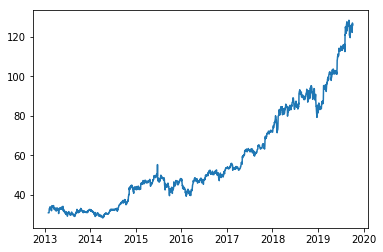

In [11]:
plt.plot(df.ZTS.Close)

In [41]:
#For some reason the splits above are fucked so imma fix it
for ticker in df.columns.levels[0]:
    splits_temp = df[ticker].Close/df[ticker]['Adj Close']
    df.T.loc[(ticker, 'splits')] = splits_temp
    df.T.loc[(ticker, 'Adj Open')] = df[ticker].Open/splits_temp
    df.T.loc[(ticker, 'Adj Low')] = df[ticker].Low/splits_temp
    df.T.loc[(ticker, 'Adj High')]= df[ticker].High/splits_temp


In [23]:
df.T.loc[('ABP','Close')] = 1

In [25]:
df.ABP.Close

Date
2002-11-11    1.0
2002-11-12    1.0
2002-11-13    1.0
2002-11-14    1.0
2002-11-17    1.0
2002-11-18    1.0
2002-11-19    1.0
2002-11-20    1.0
2002-11-21    1.0
2002-11-24    1.0
2002-11-25    1.0
2002-11-26    1.0
2002-11-27    1.0
2002-11-28    1.0
2002-12-01    1.0
2002-12-02    1.0
2002-12-03    1.0
2002-12-04    1.0
2002-12-05    1.0
2002-12-08    1.0
2002-12-09    1.0
2002-12-10    1.0
2002-12-11    1.0
2002-12-12    1.0
2002-12-15    1.0
2002-12-16    1.0
2002-12-17    1.0
2002-12-18    1.0
2002-12-19    1.0
2002-12-22    1.0
             ... 
2019-08-20    1.0
2019-08-21    1.0
2019-08-22    1.0
2019-08-23    1.0
2019-08-26    1.0
2019-08-27    1.0
2019-08-28    1.0
2019-08-29    1.0
2019-08-30    1.0
2019-09-02    1.0
2019-09-04    1.0
2019-09-05    1.0
2019-09-06    1.0
2019-09-09    1.0
2019-09-10    1.0
2019-09-11    1.0
2019-09-12    1.0
2019-09-13    1.0
2019-09-16    1.0
2019-09-17    1.0
2019-09-18    1.0
2019-09-19    1.0
2019-09-20    1.0
2019-09-23    1.0
2019-

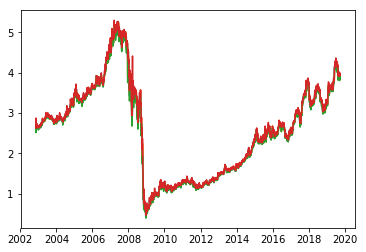

In [43]:
plt.plot(df.ABP['Adj Close'])
plt.plot(df.ABP['Adj Open'])
plt.plot(df.ABP['Adj Low'])
plt.plot(df.ABP['Adj High'])

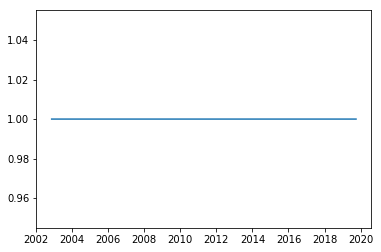

In [39]:
plt.plot(df.ABP.Close)

In [163]:
[pd.DataFrame(df.xs('Close',axis=1,level=1).iloc[1]).columns[0]] + df.xs('Close',axis=1,level=1).iloc[1].tolist()

[Timestamp('2002-11-12 00:00:00'),
 5.373439788818359,
 1.1200000047683716,
 nan,
 nan,
 0.780019998550415,
 1.1849000453948975,
 3.5015900135040283,
 6.322390079498291,
 8.808650016784668,
 7.300000190734863,
 17.2450008392334,
 2.3982999324798584,
 nan,
 2.8299999237060547,
 nan,
 4.849999904632568,
 10.918100357055664,
 nan,
 nan,
 0.37018001079559326,
 nan,
 1.190000057220459,
 2.25137996673584,
 4.258950233459473,
 6.313360214233398,
 nan,
 0.32422998547554016,
 nan,
 nan,
 7.729559898376465,
 8.811779975891113,
 nan,
 6.179999828338623,
 11.871399879455566,
 3.878420114517212,
 5.670529842376709,
 nan,
 1.8200000524520874,
 6.119999885559082,
 1.309209942817688,
 1.8600000143051147,
 nan,
 nan,
 nan,
 8.199999809265137,
 nan,
 nan,
 9.158960342407227,
 nan,
 1.3393800258636475,
 5.300000190734863,
 33.400001525878906,
 nan,
 27.05340003967285,
 1.8200000524520874,
 0.11688999831676483,
 nan,
 nan,
 0.8700000047683716,
 0.07235000282526016,
 nan,
 5.673329830169678,
 3.63720989227

In [162]:
pd.DataFrame(df.xs('Close',axis=1,level=1).iloc[1]).columns[0]

Timestamp('2002-11-12 00:00:00')

In [64]:
adjclose = df

In [66]:
nonadjclose = df

In [69]:
adjclose.values[-1]

array([3.92499995])

In [70]:
nonadjclose.values[-1]

array([3.92499995])

In [133]:
splitRatios = nonadjclose/adjclose

In [135]:
nonadjclose/splitRatios == adjclose

,ABP
Date,
2002-11-11,True
2002-11-12,True
2002-11-13,True
2002-11-14,True
2002-11-17,True
2002-11-18,True
2002-11-19,True
2002-11-20,True
2002-11-21,True


In [88]:
splitRatios =[]
for index, ogVal in enumerate(nonadjclose.values):
    splitRatio = ogVal[0]/adjclose.values[index].tolist()[0]
    splitRatios.append(splitRatio)

In [95]:
nonadjclose.ABP

Date
2002-11-11    5.37344
2002-11-12    5.37344
2002-11-13    5.56884
2002-11-14    5.37344
2002-11-17    5.37344
2002-11-18    5.37344
2002-11-19    5.37344
2002-11-20    5.37344
2002-11-21    5.37344
2002-11-24    5.37344
2002-11-25    5.51999
2002-11-26    5.51999
2002-11-27    5.47114
2002-11-28    5.47114
2002-12-01    5.47114
2002-12-02    5.47114
2002-12-03    5.42229
2002-12-04    5.42229
2002-12-05    5.42229
2002-12-08    5.42229
2002-12-09    5.42229
2002-12-10    5.42229
2002-12-11    5.42229
2002-12-12    5.47114
2002-12-15    5.47114
2002-12-16    5.37344
2002-12-17    5.37344
2002-12-18    5.37344
2002-12-19    5.42229
2002-12-22    5.42229
               ...   
2019-08-20    3.92000
2019-08-21    3.92000
2019-08-22    3.89000
2019-08-23    3.94000
2019-08-26    3.93000
2019-08-27    3.98000
2019-08-28    4.02000
2019-08-29    4.00000
2019-08-30    3.97000
2019-09-02    3.95000
2019-09-04    3.94000
2019-09-05    3.97000
2019-09-06    3.95000
2019-09-09    3.94000
2019-

In [99]:
splits = pd.Series(splitRatios)
splits.index = nonadjclose.ABP.index

Date
2002-11-11     True
2002-11-12     True
2002-11-13     True
2002-11-14     True
2002-11-17     True
2002-11-18     True
2002-11-19     True
2002-11-20     True
2002-11-21     True
2002-11-24     True
2002-11-25     True
2002-11-26     True
2002-11-27    False
2002-11-28    False
2002-12-01    False
2002-12-02    False
2002-12-03     True
2002-12-04     True
2002-12-05     True
2002-12-08     True
2002-12-09     True
2002-12-10     True
2002-12-11     True
2002-12-12    False
2002-12-15    False
2002-12-16     True
2002-12-17     True
2002-12-18     True
2002-12-19     True
2002-12-22     True
              ...  
2019-08-20     True
2019-08-21     True
2019-08-22     True
2019-08-23     True
2019-08-26     True
2019-08-27     True
2019-08-28     True
2019-08-29     True
2019-08-30     True
2019-09-02     True
2019-09-04     True
2019-09-05     True
2019-09-06     True
2019-09-09     True
2019-09-10     True
2019-09-11     True
2019-09-12     True
2019-09-13     True
2019-09-16     

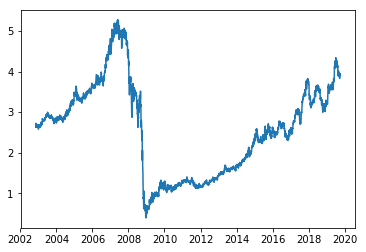

In [84]:
plt.plot(adjclose)

c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


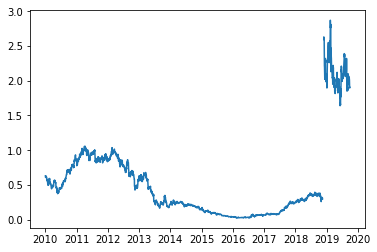

In [43]:
plt.plot(df.EHL)

In [3]:
def pickler(directory, data):
    pickle_out = open(directory,'wb')
    pickle.dump(data,pickle_out)
    pickle_out.close()
    
def dePickler(directory):
    pickle_in = open(directory,'rb')
    return pickle.load(pickle_in)

In [44]:
pickler('C:/Users/Billy/Documents/PRISMO/data/ASX/snp200data_OHLD_ADJ_2002_2019.csv', df)

In [40]:
df = dePickler('C:/Users/Billy/Documents/PRISMO/data/ASX/snp200data_OHLD_ADJ_2002_2019.csv')

In [7]:
#Fill forward na for now
df.fillna(method = 'ffill')

,ABP,ABC,APT,AGL,ALQ,ALU,AWC,AMC,AMP,ANN,...,WBC,WEB,WES,WHC,WOR,WOW,WPL,WSA,WTC,XRO
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-03,1.264219,1.824164,NaN,NaN,2.577684,0.190223,1.222107,3.593542,4.073546,8.287769,...,14.009808,1.439143,12.077490,4.363514,20.488266,18.785063,30.098234,4.309326,NaN,NaN
2010-01-04,1.292006,1.817482,NaN,NaN,2.594588,0.190223,1.244799,3.518919,4.037174,8.118631,...,14.126109,1.536948,12.235868,4.439036,20.334923,18.671600,30.376842,4.544381,NaN,NaN
2010-01-05,1.292006,1.770709,NaN,NaN,2.639379,0.190223,1.248041,3.518919,4.025052,8.280081,...,14.059650,1.585854,12.054307,4.564907,20.174696,18.638208,30.649107,4.727201,NaN,NaN
2010-01-06,1.305897,1.770709,NaN,NaN,2.687556,0.194027,1.270732,3.484472,3.934124,8.356963,...,13.871377,1.529969,11.861103,4.480993,20.941242,18.598135,30.965773,4.727201,NaN,NaN
2010-01-07,1.272372,1.757345,NaN,NaN,2.696849,0.201636,1.251282,3.536136,3.897753,8.226265,...,13.926739,1.515996,12.154730,4.506167,21.226954,18.758417,30.839104,4.570497,NaN,NaN
2010-01-10,1.230425,1.784073,NaN,NaN,2.683327,0.201636,1.335566,3.593542,3.909876,8.049439,...,13.943353,1.529969,12.189506,4.564907,20.934280,18.698317,31.206398,4.875198,NaN,NaN
2010-01-11,1.202464,1.750663,NaN,NaN,2.696007,0.205441,1.270732,3.627983,3.879568,8.057126,...,13.943353,1.550921,12.131548,4.581690,20.453449,18.558069,30.794765,4.727201,NaN,NaN
2010-01-12,1.230425,1.757345,NaN,NaN,2.677411,0.205441,1.231832,3.570583,3.873507,7.995621,...,13.899086,1.536948,12.015691,4.388689,18.111877,18.638208,30.763130,4.701083,NaN,NaN
2010-01-13,1.216444,1.750663,NaN,NaN,2.674875,0.220659,1.218866,3.605024,3.903816,7.864924,...,14.054132,1.536948,11.984759,4.480993,17.909792,18.785063,30.661814,4.631437,NaN,NaN


In [7]:
class momentum_2(backtest):
    def __init__(self, 
                timeSeries, 
                inIndex,
                toTrade, 
                shape, 
                printBool, 
                plotBool,
                decimalPlaces = 10,
                formationPeriod = None, 
                logDir = None,
                capitalPerTrade = 100,
                holdingPeriod = 1):

        super().__init__(timeSeries, 
                toTrade, 
                shape, 
                printBool, 
                plotBool,
                decimalPlaces,
                lookback=formationPeriod,
                logDir=logDir)
        
        
        self.directory = logDir            
        self.features = toTrade    
        #Decimal Places should be assigned globally for transparency
        self.decimalPlaces = decimalPlaces
        self.timeSeries = timeSeries
        
        self.lookbackStd = 10
        self.lookbackMean = 10
        
        self.T = formationPeriod #formation period
        self.holdingPeriod = holdingPeriod
        
        self.indexes = pd.MultiIndex.from_product([['returns','returnsCum','returnsMean','returnsStd','returnsRiskAdj'],list(self.features)])
        
        
        #Store all returns values
        self.returnsDf = pd.DataFrame(index = self.indexes)
        
        
        self.capitalPerTrade = capitalPerTrade
        
        #Blank template for new row
        self.newRow = pd.DataFrame(index = self.indexes)
        
        
        self.inIndexDf = inIndex
        self.featuresInIndex = None
        


            
    def generate_signals(self, row, openOrderBook):
        orders = [] 
        date = row[0]
        #Calculate the returns, append to dataframe with all the datas
        
        #Update price history
        if self.dfHistory is None:
            self.dfHistory = pd.DataFrame([row])
            self.dfHistory.columns = ['Date'] + self.features
            self.dfHistory.set_index(['Date'], inplace=True)
        else:
            temp = pd.DataFrame([row])
            temp.columns = ['Date'] + self.features
            temp.set_index(['Date'], inplace=True)
            self.dfHistory = pd.concat([self.dfHistory, temp])  
        
        
            
        if len(self.returnsDf.columns)==0:
            self.returnsDf.loc[('returns',slice(None)), date] = 0
            self.returnsDf.loc[('returnsCum',slice(None)), date] = 0
            self.returnsDf.loc[('returnsMean',slice(None)), date] = 0
            self.returnsDf.loc[('returnsStd',slice(None)), date] = 0
            self.returnsDf.loc[('returnsRiskAdj',slice(None)), date] = 0
            
        else:
            
            # Returns = P(final)/P(initial)-1
            self.returnsDf.loc[('returns',slice(None)), date] =(self.dfHistory.iloc[-1]/self.dfHistory.iloc[-2]-1).values
            
            # CumulativeReturns = P(final)/P(final-T) - 1
            if len(self.returnsDf.columns)>self.T:
                self.returnsDf.loc[('returnsCum',slice(None)), date] = (self.dfHistory.iloc[-1]/self.dfHistory.iloc[-(self.T+1)]-1).values
            else:
                self.returnsDf.loc[('returnsCum',slice(None)), date] = 0
                
            #Average of values of returns    
            if len(self.returnsDf.columns)>self.T:
                self.returnsDf.loc[('returnsMean',slice(None)), date] = self.returnsDf.T.returns.rolling(self.T).mean().iloc[-1].values
            else:
                self.returnsDf.loc[('returnsMean',slice(None)), date] = self.returnsDf.T.returns.rolling(len(self.returnsDf.columns)).mean().iloc[-1].values
            
            #Standard Deviation of returns
            if len(self.returnsDf.columns)>self.T:
                self.returnsDf.loc[('returnsStd',slice(None)), date] = self.returnsDf.T.returns.rolling(self.T).std().iloc[-1].values
            else:
                self.returnsDf.loc[('returnsStd',slice(None)), date] = self.returnsDf.T.returns.rolling(len(self.returnsDf.columns)).std().iloc[-1].values
            
            #Risk Adjusted Returns
            meanRet = self.returnsDf.T.returnsMean.iloc[-1]
            stdRet = self.returnsDf.T.returnsStd.iloc[-1]
            riskAdjRet = meanRet/stdRet
            self.returnsDf.loc[('returnsRiskAdj',slice(None)), date] = riskAdjRet.values
        
        ##### TO DELETE #####
        #Help out the thicc memory issues 
        if len(self.returnsDf)>self.T:
            self.returnsDf = self.returnsDf[self.returnsDf.columns[-(self.T+1):]]
#             self.dfHistory = self.dfHistory.iloc[-(self.T+1):]
            try:
                self.orderbook = self.orderbook.loc[self.orderbook.openClosed == 'OPEN']
            except Exception as e:
                pass

#         print(self.dfHistory, self.dfHistory)
        print(self.returnsDf.dropna().loc[('returnsRiskAdj',self.featuresInIndex), date].argsort())
        numberOfStocks = len(self.returnsDf.dropna())
        # Seperate into quantiles
    
        codesTop = (self.returnsDf.dropna().loc[('returnsRiskAdj',self.featuresInIndex), date].sort_values()).iloc[-10:].index.codes[1]
        codesBottom = (self.returnsDf.dropna().loc[('returnsRiskAdj',self.featuresInIndex), date].sort_values()).iloc[:10].index.codes[1]
        
#         print(self.returnsDf.dropna().loc[('returnsRiskAdj',slice(None)), date].sort_values())
#         print(self.returnsDf.index.levels[1][codesTop])
#         print(self.returnsDf.index.levels[1][codesBottom])
        
        
        #Close all open orders on each tick
        if openOrderBook is not None:
            for index, openOrder in openOrderBook.iterrows():

                signal = openOrder[1]
                asset = openOrder[2]
                oldDate = openOrder[5]
                quantityTrade = round(openOrder[3], self.decimalPlaces)
                price = round(openOrder[4], self.decimalPlaces)
                orderID = openOrder[0]
                newDate = row[0]
                newOrder = None     
                
                #IF: date is >=  than buying date + holding period
                if signal == 'SELL' and newDate >= oldDate + pd.DateOffset(self.holdingPeriod):
                    newSignal = 'BUY'
                    newQuantityTrade = -quantityTrade
                    newPrice =  self.dfHistory[asset].iloc[-1]
                    
                    
                    if np.isnan(newPrice):
                        pass
                    else:
                        #['ID','BUY/SELL','asset','quantity','price','date','OPEN/CLOSED']
                        newOrder = [orderID, newSignal, asset, newQuantityTrade, newPrice, newDate,'CLOSED']
                        orders.append(newOrder)

                if signal == 'BUY' and row[0] >= oldDate + pd.DateOffset(self.holdingPeriod):
                    newSignal = 'SELL'
                    newQuantityTrade = -quantityTrade
                    newPrice =  self.dfHistory[asset].iloc[-1]

                    
                    if np.isnan(newPrice):
                        pass
                    else:
                        #['ID','BUY/SELL','asset','quantity','price','date','OPEN/CLOSED']
                        newOrder = [orderID, newSignal, asset, newQuantityTrade, newPrice, newDate,'CLOSED']
                        orders.append(newOrder)



        
        if len(self.returnsDf.columns)>self.T:
            # Create buy orders for stocks in top quantile for risk adj. returns, and create short orders for the others
            for topQuantileTick in list(self.returnsDf.index.levels[1][codesTop]):
                if topQuantileTick in self.featuresInIndex:
                    price = self.dfHistory[topQuantileTick].iloc[-1]
                    quantity = float(self.capitalPerTrade/price)
                    orders.append([None, 'BUY',  topQuantileTick,  quantity, price, date, 'OPEN'])

            for bottomQuantileTick in list(self.returnsDf.index.levels[1][codesBottom]):
                if bottomQuantileTick in self.featuresInIndex:
                    price = self.dfHistory[bottomQuantileTick].iloc[-1]
                    quantity = float(-self.capitalPerTrade/price)
                    orders.append([None, 'SELL',  bottomQuantileTick,  quantity, price, date, 'OPEN'])




        return orders

    
    def run(self):
        for index, row in tqdm_notebook(enumerate(self.timeSeries.itertuples())):
             #Stupid but this creates a list of [date, price1, price2, ...]
                
            self.featuresInIndex = [x for x in compress(self.features, self.inIndexDf.iloc[index].tolist())]
            
            #Create array of open orders to pass into strategy
            if self.orderbook is not None and len(self.orderbook)>0:
                openOrderBook = self.orderbook.loc[self.orderbook['openClosed']=='OPEN']  
            else:
                openOrderBook = None
                
#             print(date)
            
            orders = self.generate_signals(row, openOrderBook)
            print(orders)
            
            self.tick(row, orders)


In [4]:
data = pickle.load(open( "D:/PRISMO/historicalData/data/asx200nobiasInIndexAdded.pickle", "rb" ) )

In [5]:
inIndex = data.xs('inIndex', axis = 1, level = 1).loc['2010-01-01 00:00:00':]
close = data.xs('CLOSE', axis = 1, level = 1).loc['2010-01-01 00:00:00':]

In [8]:
runDate = str(datetime.datetime.today()).replace('-','_').replace(' ','_').replace(':','_')[:-10]
logDirectory = 'C:/Users/Billy/Documents/PRISMO/logs/momentum_1_SNP200ASX_'+ runDate 
try:
    os.makedirs(logDirectory)
except Exception as e:
    print(e)

strat = momentum_2(close,
                   inIndex,
                  list(close.columns),
                  None, 
                  True,
                  True,
                  logDir = logDirectory,
                  formationPeriod = 12,
                  holdingPeriod = 4)
strat.run()


returnsRiskAdj  ORG.AX            0
                WOW.AX          122
                WPL.AX          123
                WBC.AX          124
                WFANA.AX^H00    125
                ART.AX^H03      126
                WES.AX          127
                VRLPA.AX^L10    128
                VRL.AX          129
                VID.AX^G09      130
                WYL.AX^I10      121
                UXC.AX^B16      131
                UTB.AX^K06      133
                TCL.AX          134
                TOL.AX^E15      135
                TIM.AX^H11      136
                THG.AX^J12      137
                TEN.AX^K17      138
                TAH.AX          139
                SYB.AX^E08      140
                SUNDC.AX        141
                SGP.AX          132
                JUP.AX^L03      142
                SGB.AX^D09      120
                SSX.AX^H07      118
                SPT.AX^H12       98
                SRP.AX^F05       99
                SOH.AX^H04  

Name: 2010-01-07 00:00:00, Length: 87, dtype: int64
[]
returnsRiskAdj  ORG.AX        77
                WOW.AX        42
                WPL.AX        29
                WBC.AX        53
                WES.AX        25
                WYL.AX^I10    17
                TCL.AX        43
                TOL.AX^E15    62
                THG.AX^J12    35
                TEN.AX^K17    48
                TAH.AX        64
                SUNDC.AX      16
                SGP.AX        40
                SPT.AX^H12    41
                SKE.AX^J15    31
                SGM.AX        45
                SLX.AX        65
                SEV.AX^G10     3
                STO.AX        71
                RIO.AX        54
                QAN.AX        66
                OVT.AX        56
                ORI.AX        32
                OEC.AX        82
                OSH.AX        79
                NUF.AX        23
                MGR.AX        50
                MQG.AX         1
                LGL.A

Name: 2010-01-13 00:00:00, Length: 87, dtype: int64
[]
returnsRiskAdj  ORG.AX        77
                WOW.AX        53
                WPL.AX        16
                WBC.AX        17
                WES.AX        41
                WYL.AX^I10    48
                TCL.AX        40
                TOL.AX^E15    56
                THG.AX^J12    25
                TEN.AX^K17    62
                TAH.AX        38
                SUNDC.AX      29
                SGP.AX        71
                SPT.AX^H12    23
                SKE.AX^J15    32
                SGM.AX        66
                SLX.AX        35
                SEV.AX^G10    22
                STO.AX        42
                RIO.AX        18
                QAN.AX        54
                OVT.AX        57
                ORI.AX        50
                OEC.AX        13
                OSH.AX        37
                NUF.AX        43
                MGR.AX        64
                MQG.AX        30
                LGL.A

Name: 2010-01-19 00:00:00, Length: 85, dtype: int64
[]
returnsRiskAdj  ORG.AX        47
                WOW.AX        61
                WPL.AX        24
                WBC.AX        55
                WES.AX        40
                WYL.AX^I10    23
                TCL.AX        39
                TOL.AX^E15    65
                THG.AX^J12    70
                TEN.AX^K17    18
                TAH.AX        52
                SUNDC.AX       1
                SGP.AX        37
                SPT.AX^H12    56
                SKE.AX^J15    66
                SGM.AX        41
                SLX.AX        22
                SEV.AX^G10    16
                STO.AX        73
                RIO.AX        28
                QAN.AX         2
                OVT.AX        49
                ORI.AX        48
                OSH.AX        36
                NUF.AX         4
                MGR.AX         5
                MQG.AX        34
                LGL.AX^J10    13
                LLC.A

[[None, 'BUY', 'WEB.AX', 45.292618351047665, 2.207865291093, Timestamp('2010-01-21 00:00:00'), 'OPEN'], [None, 'BUY', 'GOZ.AX', 62.30120237575061, 1.6051054584288862, Timestamp('2010-01-21 00:00:00'), 'OPEN'], [None, 'BUY', 'PLA.AX^I15', 86.11046767456098, 1.161299, Timestamp('2010-01-21 00:00:00'), 'OPEN'], [None, 'BUY', 'KZA.AX', 16.637796408265107, 6.010411327687801, Timestamp('2010-01-21 00:00:00'), 'OPEN'], [None, 'BUY', 'ASB.AX', 55.393581031713424, 1.80526332, Timestamp('2010-01-21 00:00:00'), 'OPEN'], [None, 'BUY', 'FLT.AX', 5.233437413005878, 19.107900240000003, Timestamp('2010-01-21 00:00:00'), 'OPEN'], [None, 'BUY', 'ITO.AX^L10', 79.68375112852112, 1.254961, Timestamp('2010-01-21 00:00:00'), 'OPEN'], [None, 'BUY', 'SUNDC.AX', 11.463163730543872, 8.723595191574175, Timestamp('2010-01-21 00:00:00'), 'OPEN'], [None, 'BUY', 'FGX.AX', 1221.9418788420787, 0.081836952912, Timestamp('2010-01-21 00:00:00'), 'OPEN'], [None, 'BUY', 'MQG.AX', 1.9077842047445268, 52.4168298234711, Timest

Name: 2010-01-25 00:00:00, Length: 91, dtype: int64
[[7436, 'SELL', 'BKW.AX', -7.8554595444, 12.5, Timestamp('2010-01-25 00:00:00'), 'CLOSED'], [9903, 'SELL', 'FLT.AX', -5.175811976, 18.36331101, Timestamp('2010-01-25 00:00:00'), 'CLOSED'], [1302, 'SELL', 'SUNDC.AX', -11.6143263292, 8.468131991820918, Timestamp('2010-01-25 00:00:00'), 'CLOSED'], [3947, 'SELL', 'WEB.AX', -45.292618351, 2.207865291093, Timestamp('2010-01-25 00:00:00'), 'CLOSED'], [4334, 'SELL', 'ITO.AX^L10', -80.4832212604, 1.25, Timestamp('2010-01-25 00:00:00'), 'CLOSED'], [4914, 'SELL', 'PLA.AX^I15', -82.6242110421, 1.151499, Timestamp('2010-01-25 00:00:00'), 'CLOSED'], [7408, 'SELL', 'TSO.AX^F12', -240.9638554217, 0.395, Timestamp('2010-01-25 00:00:00'), 'CLOSED'], [544, 'SELL', 'RIV.AX^G11', -12.0500598044, 7.783758, Timestamp('2010-01-25 00:00:00'), 'CLOSED'], [5413, 'SELL', 'FGX.AX', -1209.2133176041, 0.08032943009520001, Timestamp('2010-01-25 00:00:00'), 'CLOSED'], [9861, 'SELL', 'MQG.AX', -1.9298709074, 50.449969

[[8829, 'SELL', 'MQG.AX', -1.9706375603, 50.48930662545978, Timestamp('2010-01-27 00:00:00'), 'CLOSED'], [1935, 'SELL', 'FLT.AX', -5.3581721907, 18.70176066, Timestamp('2010-01-27 00:00:00'), 'CLOSED'], [7591, 'SELL', 'RIC.AX', -95.1826173697, 1.0234409999999998, Timestamp('2010-01-27 00:00:00'), 'CLOSED'], [6535, 'SELL', 'PLA.AX^I15', -87.9662983518, 1.122099, Timestamp('2010-01-27 00:00:00'), 'CLOSED'], [9228, 'SELL', 'TAH.AX', -31.8001121882, 3.0969311692278962, Timestamp('2010-01-27 00:00:00'), 'CLOSED'], [2435, 'SELL', 'FGX.AX', -1231.6655542705, 0.0790372676808, Timestamp('2010-01-27 00:00:00'), 'CLOSED'], [6014, 'SELL', 'KZA.AX', -16.7592401777, 5.182890927498899, Timestamp('2010-01-27 00:00:00'), 'CLOSED'], [2922, 'SELL', 'SUNDC.AX', -11.678493878, 8.373515991912301, Timestamp('2010-01-27 00:00:00'), 'CLOSED'], [2144, 'SELL', 'ASB.AX', -55.6273092217, 1.84318902, Timestamp('2010-01-27 00:00:00'), 'CLOSED'], [4687, 'SELL', 'VRL.AX', -69.8812963095, 1.3772516615762807, Timestamp(

Name: 2010-01-29 00:00:00, Length: 90, dtype: int64
[[7568, 'SELL', 'FGX.AX', -1244.8737639678, 0.07839118647360001, Timestamp('2010-01-29 00:00:00'), 'CLOSED'], [1193, 'SELL', 'CPU.AX', -8.3963056255, 11.61, Timestamp('2010-01-29 00:00:00'), 'CLOSED'], [4101, 'SELL', 'SUNDC.AX', -11.8089798431, 8.42082399186661, Timestamp('2010-01-29 00:00:00'), 'CLOSED'], [5873, 'SELL', 'FLT.AX', -5.4456410364, 19.214270130000003, Timestamp('2010-01-29 00:00:00'), 'CLOSED'], [9390, 'SELL', 'TAH.AX', -31.9765344473, 3.0492193444918922, Timestamp('2010-01-29 00:00:00'), 'CLOSED'], [9040, 'SELL', 'PLA.AX^I15', -86.843323355, 0.994699, Timestamp('2010-01-29 00:00:00'), 'CLOSED'], [3538, 'SELL', 'IIN.AX^I15', -53.3803649936, 1.822341, Timestamp('2010-01-29 00:00:00'), 'CLOSED'], [2604, 'SELL', 'MQG.AX', -1.9821617566, 49.32885898584072, Timestamp('2010-01-29 00:00:00'), 'CLOSED'], [5446, 'SELL', 'ASB.AX', -55.6273092217, 1.82801874, Timestamp('2010-01-29 00:00:00'), 'CLOSED'], [1295, 'SELL', 'WEB.AX', -45

[[7640, 'SELL', 'CPU.AX', -8.4033613445, 11.65, Timestamp('2010-02-01 00:00:00'), 'CLOSED'], [5992, 'SELL', 'KZA.AX', -19.294251297, 4.9215686958603, Timestamp('2010-02-01 00:00:00'), 'CLOSED'], [1088, 'SELL', 'FXJ.AX^L18', -87.5913073686, 1.12237004, Timestamp('2010-02-01 00:00:00'), 'CLOSED'], [7517, 'SELL', 'FGX.AX', -1265.2259235967, 0.07731438446160001, Timestamp('2010-02-01 00:00:00'), 'CLOSED'], [2632, 'SELL', 'PLA.AX^I15', -89.1186963004, 0.881999, Timestamp('2010-02-01 00:00:00'), 'CLOSED'], [4212, 'SELL', 'FLT.AX', -5.3470901386, 18.84681051, Timestamp('2010-02-01 00:00:00'), 'CLOSED'], [7376, 'SELL', 'MQG.AX', -1.9806174155, 48.9748241127366, Timestamp('2010-02-01 00:00:00'), 'CLOSED'], [8389, 'SELL', 'IIN.AX^I15', -52.8570280819, 1.780608, Timestamp('2010-02-01 00:00:00'), 'CLOSED'], [1787, 'SELL', 'ASB.AX', -54.2537954138, 1.82801874, Timestamp('2010-02-01 00:00:00'), 'CLOSED'], [946, 'SELL', 'WEB.AX', -45.4904027107, 2.2750611912567003, Timestamp('2010-02-01 00:00:00'), '

[[6547, 'SELL', 'IOF.AX^L18', -41.2766709209, 2.3233859999999997, Timestamp('2010-02-02 00:00:00'), 'CLOSED'], [1868, 'SELL', 'SEV.AX^G10', -14.9476831091, 6.7, Timestamp('2010-02-02 00:00:00'), 'CLOSED'], [7063, 'SELL', 'FXJ.AX^L18', -89.8696939764, 1.1095062, Timestamp('2010-02-02 00:00:00'), 'CLOSED'], [6980, 'SELL', 'SUNDC.AX', -11.8753224265, 8.27889999200369, Timestamp('2010-02-02 00:00:00'), 'CLOSED'], [3572, 'SELL', 'WFD.AX^F18', -16.2257165925, 6.289828, Timestamp('2010-02-02 00:00:00'), 'CLOSED'], [7232, 'SELL', 'MQG.AX', -2.0272108874, 49.5648822345768, Timestamp('2010-02-02 00:00:00'), 'CLOSED'], [7794, 'SELL', 'VRL.AX', -70.8796005425, 1.336941856847219, Timestamp('2010-02-02 00:00:00'), 'CLOSED'], [8785, 'SELL', 'ASB.AX', -54.7040343799, 1.8204335999999999, Timestamp('2010-02-02 00:00:00'), 'CLOSED'], [69, 'SELL', 'FLT.AX', -5.2044651878, 19.146580200000002, Timestamp('2010-02-02 00:00:00'), 'CLOSED'], [4909, 'SELL', 'WEB.AX', -43.9548616909, 2.3326576771113, Timestamp('2

Name: 2010-02-04 00:00:00, Length: 89, dtype: int64
[[None, 'BUY', 'FGL.AX^L11', 22.099862649353636, 4.524915, Timestamp('2010-02-04 00:00:00'), 'OPEN'], [None, 'BUY', 'MQG.AX', 1.9110110526758741, 52.32832110519507, Timestamp('2010-02-04 00:00:00'), 'OPEN'], [None, 'BUY', 'SEV.AX^G10', 14.814814814814815, 6.75, Timestamp('2010-02-04 00:00:00'), 'OPEN'], [None, 'BUY', 'SUNDC.AX', 11.401334368458956, 8.770903191528479, Timestamp('2010-02-04 00:00:00'), 'OPEN'], [None, 'BUY', 'FLT.AX', 5.431340508455681, 18.41166096, Timestamp('2010-02-04 00:00:00'), 'OPEN'], [None, 'BUY', 'WEB.AX', 44.518385558722066, 2.2462629483293997, Timestamp('2010-02-04 00:00:00'), 'OPEN'], [None, 'BUY', 'FOX.AX^E14', 5.9212184256948674, 16.888416, Timestamp('2010-02-04 00:00:00'), 'OPEN'], [None, 'BUY', 'FOXLV.AX^E14', 6.905564199787364, 14.481076, Timestamp('2010-02-04 00:00:00'), 'OPEN'], [None, 'BUY', 'IIN.AX^I15', 49.01288058501774, 2.04028, Timestamp('2010-02-04 00:00:00'), 'OPEN'], [None, 'BUY', 'ASB.AX', 5

Name: 2010-02-08 00:00:00, Length: 88, dtype: int64
[[8627, 'SELL', 'THG.AX^J12', -285.7142857143, 0.355, Timestamp('2010-02-08 00:00:00'), 'CLOSED'], [2514, 'SELL', 'SGP.AX', -25.5754475703, 3.85, Timestamp('2010-02-08 00:00:00'), 'CLOSED'], [5912, 'SELL', 'HT1.AX', -10.8934663229, 8.829736819047344, Timestamp('2010-02-08 00:00:00'), 'CLOSED'], [1841, 'SELL', 'GPT.AX', -33.3333333333, 2.9, Timestamp('2010-02-08 00:00:00'), 'CLOSED'], [9439, 'SELL', 'SEV.AX^G10', -14.9253731343, 6.88, Timestamp('2010-02-08 00:00:00'), 'CLOSED'], [8917, 'SELL', 'WFD.AX^F18', -15.8986859418, 5.938768, Timestamp('2010-02-08 00:00:00'), 'CLOSED'], [6688, 'SELL', 'CMJ.AX^K12', -32.4675324675, 3.03, Timestamp('2010-02-08 00:00:00'), 'CLOSED'], [7967, 'SELL', 'ASB.AX', -54.9319678564, 1.8583593000000003, Timestamp('2010-02-08 00:00:00'), 'CLOSED'], [9984, 'SELL', 'FLT.AX', -5.2228648122, 17.76377163, Timestamp('2010-02-08 00:00:00'), 'CLOSED'], [2366, 'SELL', 'WEB.AX', -42.869556464, 2.0638740764565, Timestam

Name: 2010-02-09 00:00:00, Length: 88, dtype: int64
[[6732, 'SELL', 'GPT.AX', -33.6134453782, 2.8499999999999996, Timestamp('2010-02-09 00:00:00'), 'CLOSED'], [8705, 'SELL', 'SPT.AX^H12', -35.8422939068, 2.79, Timestamp('2010-02-09 00:00:00'), 'CLOSED'], [4540, 'SELL', 'CMJ.AX^K12', -32.2580645161, 3.04, Timestamp('2010-02-09 00:00:00'), 'CLOSED'], [9316, 'SELL', 'CWN.AX', -13.6680137861, 7.148160000000001, Timestamp('2010-02-09 00:00:00'), 'CLOSED'], [3739, 'SELL', 'SEV.AX^G10', -14.880952381, 6.8, Timestamp('2010-02-09 00:00:00'), 'CLOSED'], [4334, 'SELL', 'IIN.AX^I15', -50.8624232486, 1.975362, Timestamp('2010-02-09 00:00:00'), 'CLOSED'], [9105, 'SELL', 'FOX.AX^E14', -6.0675856227, 15.869926, Timestamp('2010-02-09 00:00:00'), 'CLOSED'], [7481, 'SELL', 'FOXLV.AX^E14', -7.0961251041, 13.592212, Timestamp('2010-02-09 00:00:00'), 'CLOSED'], [8177, 'SELL', 'ASB.AX', -54.0314437932, 1.8204335999999999, Timestamp('2010-02-09 00:00:00'), 'CLOSED'], [4221, 'SELL', 'FGL.AX^L11', -21.902542447

Name: 2010-02-11 00:00:00, Length: 87, dtype: int64
[[None, 'BUY', 'FGL.AX^L11', 22.300770491620487, 4.48415, Timestamp('2010-02-11 00:00:00'), 'OPEN'], [None, 'BUY', 'GPT.AX', 34.18803418803419, 2.925, Timestamp('2010-02-11 00:00:00'), 'OPEN'], [None, 'BUY', 'GWA.AX', 31.93540642392523, 3.131320725108494, Timestamp('2010-02-11 00:00:00'), 'OPEN'], [None, 'BUY', 'SPT.AX^H12', 34.36426116838488, 2.91, Timestamp('2010-02-11 00:00:00'), 'OPEN'], [None, 'BUY', 'GOZ.AX', 61.55508019160989, 1.624561282167418, Timestamp('2010-02-11 00:00:00'), 'OPEN'], [None, 'BUY', 'ASB.AX', 53.15996889333788, 1.88111472, Timestamp('2010-02-11 00:00:00'), 'OPEN'], [None, 'BUY', 'SGP.AX', 25.062656641604008, 3.99, Timestamp('2010-02-11 00:00:00'), 'OPEN'], [None, 'BUY', 'EVT.AX', 17.626713870783142, 5.6732071975, Timestamp('2010-02-11 00:00:00'), 'OPEN'], [None, 'BUY', 'UGL.AX^A17', 16.732576284651913, 5.976366, Timestamp('2010-02-11 00:00:00'), 'OPEN'], [None, 'BUY', 'SEV.AX^G10', 13.88888888888889, 7.2, Tim

Name: 2010-02-15 00:00:00, Length: 87, dtype: int64
[[1292, 'SELL', 'TEN.AX^K17', -8.1935909568, 13.340831, Timestamp('2010-02-15 00:00:00'), 'CLOSED'], [6519, 'SELL', 'ASB.AX', -54.9319678564, 1.85077416, Timestamp('2010-02-15 00:00:00'), 'CLOSED'], [1062, 'SELL', 'ENE.AX^J15', -36.3636363636, 2.75, Timestamp('2010-02-15 00:00:00'), 'CLOSED'], [9139, 'SELL', 'FOXLV.AX^E14', -7.3571542292, 13.70332, Timestamp('2010-02-15 00:00:00'), 'CLOSED'], [9982, 'SELL', 'SEV.AX^G10', -14.7058823529, 7.15, Timestamp('2010-02-15 00:00:00'), 'CLOSED'], [4644, 'SELL', 'BKN.AX^E17', -15.3139356815, 6.76, Timestamp('2010-02-15 00:00:00'), 'CLOSED'], [7542, 'SELL', 'GWA.AX', -33.0649545611, 2.9465533531300423, Timestamp('2010-02-15 00:00:00'), 'CLOSED'], [1738, 'SELL', 'CSL.AX', -3.1695721078, 32.0, Timestamp('2010-02-15 00:00:00'), 'CLOSED'], [170, 'SELL', 'IIN.AX^I15', -50.6236325291, 2.049554, Timestamp('2010-02-15 00:00:00'), 'CLOSED'], [6554, 'SELL', 'FGL.AX^L11', -22.2602972239, 4.533068, Timestamp

Name: 2010-02-16 00:00:00, Length: 87, dtype: int64
[[4928, 'SELL', 'CRG.AX^E11', -11.3322768629, 8.08265, Timestamp('2010-02-16 00:00:00'), 'CLOSED'], [752, 'SELL', 'SGP.AX', -25.3807106599, 3.88, Timestamp('2010-02-16 00:00:00'), 'CLOSED'], [4227, 'SELL', 'BKN.AX^E17', -14.7275405007, 6.72, Timestamp('2010-02-16 00:00:00'), 'CLOSED'], [3748, 'SELL', 'SPT.AX^H12', -35.2112676056, 2.87, Timestamp('2010-02-16 00:00:00'), 'CLOSED'], [2950, 'SELL', 'GOZ.AX', -61.0071121187, 1.624561282167418, Timestamp('2010-02-16 00:00:00'), 'CLOSED'], [5676, 'SELL', 'FGL.AX^L11', -22.1397540982, 4.435232, Timestamp('2010-02-16 00:00:00'), 'CLOSED'], [3581, 'SELL', 'EVT.AX', -17.0342192869, 5.9198683800000005, Timestamp('2010-02-16 00:00:00'), 'CLOSED'], [6309, 'SELL', 'TEN.AX^K17', -7.5371979562, 13.194228, Timestamp('2010-02-16 00:00:00'), 'CLOSED'], [8462, 'SELL', 'UGL.AX^A17', -16.6603496174, 5.976366, Timestamp('2010-02-16 00:00:00'), 'CLOSED'], [4486, 'SELL', 'SEV.AX^G10', -13.7551581843, 7.07, Tim

Name: 2010-02-18 00:00:00, Length: 87, dtype: int64
[[None, 'BUY', 'TEN.AX^K17', 7.454824508958164, 13.414132, Timestamp('2010-02-18 00:00:00'), 'OPEN'], [None, 'BUY', 'FGL.AX^L11', 21.70871463786065, 4.606445, Timestamp('2010-02-18 00:00:00'), 'OPEN'], [None, 'BUY', 'CPU.AX', 8.237232289950576, 12.14, Timestamp('2010-02-18 00:00:00'), 'OPEN'], [None, 'BUY', 'HDF.AX^A13', 89.68609865470852, 1.115, Timestamp('2010-02-18 00:00:00'), 'OPEN'], [None, 'BUY', 'CSL.AX', 2.9411764705882355, 34.0, Timestamp('2010-02-18 00:00:00'), 'OPEN'], [None, 'BUY', 'SEV.AX^G10', 13.793103448275861, 7.25, Timestamp('2010-02-18 00:00:00'), 'OPEN'], [None, 'BUY', 'UGL.AX^A17', 16.54134666742316, 6.045457, Timestamp('2010-02-18 00:00:00'), 'OPEN'], [None, 'BUY', 'RIV.AX^G11', 11.879941313089914, 8.41755, Timestamp('2010-02-18 00:00:00'), 'OPEN'], [None, 'BUY', 'EVT.AX', 16.642628038916758, 6.0086664057, Timestamp('2010-02-18 00:00:00'), 'OPEN'], [None, 'BUY', 'WES.AX', 4.717053340135114, 21.199675473064637, Ti

Name: 2010-02-22 00:00:00, Length: 87, dtype: int64
[[4060, 'SELL', 'SGP.AX', -25.7731958763, 3.98, Timestamp('2010-02-22 00:00:00'), 'CLOSED'], [6780, 'SELL', 'IIN.AX^I15', -49.2366836927, 1.975362, Timestamp('2010-02-22 00:00:00'), 'CLOSED'], [9676, 'SELL', 'CSL.AX', -3.1007751938, 34.76, Timestamp('2010-02-22 00:00:00'), 'CLOSED'], [2488, 'SELL', 'BKN.AX^E17', -14.880952381, 6.65, Timestamp('2010-02-22 00:00:00'), 'CLOSED'], [8299, 'SELL', 'RIV.AX^G11', -12.2846108469, 8.041236, Timestamp('2010-02-22 00:00:00'), 'CLOSED'], [7700, 'SELL', 'SEV.AX^G10', -14.14427157, 6.98, Timestamp('2010-02-22 00:00:00'), 'CLOSED'], [5898, 'SELL', 'TEN.AX^K17', -7.5790716971, 13.377482, Timestamp('2010-02-22 00:00:00'), 'CLOSED'], [4133, 'SELL', 'UGL.AX^A17', -16.7325762847, 6.321821, Timestamp('2010-02-22 00:00:00'), 'CLOSED'], [1629, 'SELL', 'EVT.AX', -16.8922674595, 6.038265747600001, Timestamp('2010-02-22 00:00:00'), 'CLOSED'], [2876, 'SELL', 'WES.AX', -4.8846643725, 22.453643205294927, Timestamp

Name: 2010-02-23 00:00:00, Length: 86, dtype: int64
[[9135, 'SELL', 'RIC.AX', -96.8524878499, 1.014384, Timestamp('2010-02-23 00:00:00'), 'CLOSED'], [7379, 'SELL', 'WBC.AX', -3.9728570496, 26.060579452674, Timestamp('2010-02-23 00:00:00'), 'CLOSED'], [3304, 'SELL', 'RIV.AX^G11', -12.3296094214, 8.061042, Timestamp('2010-02-23 00:00:00'), 'CLOSED'], [7538, 'SELL', 'TEN.AX^K17', -7.454824509, 13.30418, Timestamp('2010-02-23 00:00:00'), 'CLOSED'], [3068, 'SELL', 'HDF.AX^A13', -88.1057268722, 1.145, Timestamp('2010-02-23 00:00:00'), 'CLOSED'], [5592, 'SELL', 'UGL.AX^A17', -16.4590521824, 6.317503, Timestamp('2010-02-23 00:00:00'), 'CLOSED'], [6618, 'SELL', 'CSL.AX', -2.9351335486, 34.87, Timestamp('2010-02-23 00:00:00'), 'CLOSED'], [1791, 'SELL', 'SEV.AX^G10', -13.5869565217, 7.15, Timestamp('2010-02-23 00:00:00'), 'CLOSED'], [270, 'SELL', 'EVT.AX', -16.6426280389, 5.9198683800000005, Timestamp('2010-02-23 00:00:00'), 'CLOSED'], [3242, 'SELL', 'WES.AX', -4.6263407759, 22.280443242279688, T

Name: 2010-02-25 00:00:00, Length: 86, dtype: int64
[[None, 'BUY', 'ORI.AX', 4.243067877247877, 23.567853, Timestamp('2010-02-25 00:00:00'), 'OPEN'], [None, 'BUY', 'MGR.AX', 64.1025641025641, 1.56, Timestamp('2010-02-25 00:00:00'), 'OPEN'], [None, 'BUY', 'ACR.AX', 62.15453961476032, 1.6088929403999999, Timestamp('2010-02-25 00:00:00'), 'OPEN'], [None, 'BUY', 'UGL.AX^A17', 16.149153582487855, 6.192275, Timestamp('2010-02-25 00:00:00'), 'OPEN'], [None, 'BUY', 'CSL.AX', 2.901915264074289, 34.46, Timestamp('2010-02-25 00:00:00'), 'OPEN'], [None, 'BUY', 'IFL.AX', 16.865425708643023, 5.92929, Timestamp('2010-02-25 00:00:00'), 'OPEN'], [None, 'BUY', 'WBC.AX', 3.9372884578659915, 25.3981899142335, Timestamp('2010-02-25 00:00:00'), 'OPEN'], [None, 'BUY', 'KMD.AX', 62.676846640097956, 1.5954855, Timestamp('2010-02-25 00:00:00'), 'OPEN'], [None, 'BUY', 'WES.AX', 4.632279595896487, 21.587643390218755, Timestamp('2010-02-25 00:00:00'), 'OPEN'], [None, 'BUY', 'HDF.AX^A13', 84.03361344537815, 1.19, T

Name: 2010-03-01 00:00:00, Length: 86, dtype: int64
[[4559, 'SELL', 'UXC.AX^B16', -166.2043415898, 0.450169, Timestamp('2010-03-01 00:00:00'), 'CLOSED'], [2924, 'SELL', 'SLX.AX', -17.2117039587, 5.71, Timestamp('2010-03-01 00:00:00'), 'CLOSED'], [4405, 'SELL', 'TEN.AX^K17', -7.5164346844, 12.791072, Timestamp('2010-03-01 00:00:00'), 'CLOSED'], [7063, 'SELL', 'CSL.AX', -2.8677946659, 34.85, Timestamp('2010-03-01 00:00:00'), 'CLOSED'], [3792, 'SELL', 'RIV.AX^G11', -12.405344123, 7.516377, Timestamp('2010-03-01 00:00:00'), 'CLOSED'], [2796, 'SELL', 'HDF.AX^A13', -87.3362445415, 1.185, Timestamp('2010-03-01 00:00:00'), 'CLOSED'], [4994, 'SELL', 'KMD.AX', -61.9239716054, 1.629432, Timestamp('2010-03-01 00:00:00'), 'CLOSED'], [3503, 'SELL', 'WBC.AX', -3.8372132201, 26.228648440039503, Timestamp('2010-03-01 00:00:00'), 'CLOSED'], [9568, 'SELL', 'UGL.AX^A17', -15.8290387832, 6.330457, Timestamp('2010-03-01 00:00:00'), 'CLOSED'], [2921, 'SELL', 'WES.AX', -4.4882410512, 22.585275177186514, Times

Name: 2010-03-02 00:00:00, Length: 86, dtype: int64
[[8771, 'SELL', 'UGL.AX^A17', -15.9930142514, 6.270003, Timestamp('2010-03-02 00:00:00'), 'CLOSED'], [8808, 'SELL', 'IFL.AX', -16.5077576267, 6.314693849999999, Timestamp('2010-03-02 00:00:00'), 'CLOSED'], [2411, 'SELL', 'IOF.AX^L18', -41.6178004327, 2.402818, Timestamp('2010-03-02 00:00:00'), 'CLOSED'], [5909, 'SELL', 'CSL.AX', -2.9078220413, 34.73, Timestamp('2010-03-02 00:00:00'), 'CLOSED'], [6688, 'SELL', 'SKE.AX^J15', -62.0602257255, 1.571167, Timestamp('2010-03-02 00:00:00'), 'CLOSED'], [9724, 'SELL', 'ACR.AX', -61.8513467386, 1.6088929403999999, Timestamp('2010-03-02 00:00:00'), 'CLOSED'], [8769, 'SELL', 'WES.AX', -4.6367437266, 22.238875251156045, Timestamp('2010-03-02 00:00:00'), 'CLOSED'], [3548, 'SELL', 'WBC.AX', -3.8709889201, 26.4263766604695, Timestamp('2010-03-02 00:00:00'), 'CLOSED'], [965, 'SELL', 'KMD.AX', -62.4869168018, 1.639131, Timestamp('2010-03-02 00:00:00'), 'CLOSED'], [2883, 'SELL', 'HDF.AX^A13', -82.98755186

Name: 2010-03-04 00:00:00, Length: 86, dtype: int64
[[None, 'BUY', 'MGR.AX', 62.695924764890286, 1.595, Timestamp('2010-03-04 00:00:00'), 'OPEN'], [None, 'BUY', 'WBC.AX', 3.754600611825439, 26.633991291921, Timestamp('2010-03-04 00:00:00'), 'OPEN'], [None, 'BUY', 'BRS.AX^F16', 24.562058496998517, 4.07132, Timestamp('2010-03-04 00:00:00'), 'OPEN'], [None, 'BUY', 'CPA.AX^D14', 102.8520884116552, 0.97227, Timestamp('2010-03-04 00:00:00'), 'OPEN'], [None, 'BUY', 'KMD.AX', 60.29439340524043, 1.658529, Timestamp('2010-03-04 00:00:00'), 'OPEN'], [None, 'BUY', 'OVT.AX', 133.33333333333334, 0.75, Timestamp('2010-03-04 00:00:00'), 'OPEN'], [None, 'BUY', 'SGP.AX', 23.80952380952381, 4.2, Timestamp('2010-03-04 00:00:00'), 'OPEN'], [None, 'BUY', 'IOF.AX^L18', 40.28603081881357, 2.48225, Timestamp('2010-03-04 00:00:00'), 'OPEN'], [None, 'BUY', 'IFL.AX', 15.811336601852835, 6.324576, Timestamp('2010-03-04 00:00:00'), 'OPEN'], [None, 'BUY', 'HDF.AX^A13', 80.97165991902834, 1.235, Timestamp('2010-03-04

KeyboardInterrupt: 

In [36]:
list(strat.orderbook.date)[0] - pd.DateOffset(1) >= list(strat.orderbook.date)[0]

False

In [30]:
+ pd.DateOffset(1)

Timestamp('1970-01-01 00:00:00.000000001')

In [204]:
df.head()

,ABP,ABC,APT,AGL,ALQ,ALU,AWC,AMC,AMP,ANN,...,WBC,WEB,WES,WHC,WOR,WOW,WPL,WSA,WTC,XRO
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-03,1.264219,1.824164,NaN,NaN,2.577684,0.190223,1.222107,3.593542,4.073546,8.287769,...,14.009808,1.439143,12.077490,4.363514,20.488266,18.785063,30.098234,4.309326,NaN,NaN
2010-01-04,1.292006,1.817482,NaN,NaN,2.594588,0.190223,1.244799,3.518919,4.037174,8.118631,...,14.126109,1.536948,12.235868,4.439036,20.334923,18.671600,30.376842,4.544381,NaN,NaN
2010-01-05,1.292006,1.770709,NaN,NaN,2.639379,0.190223,1.248041,3.518919,4.025052,8.280081,...,14.059650,1.585854,12.054307,4.564907,20.174696,18.638208,30.649107,4.727201,NaN,NaN
2010-01-06,1.305897,1.770709,NaN,NaN,2.687556,0.194027,1.270732,3.484472,3.934124,8.356963,...,13.871377,1.529969,11.861103,4.480993,20.941242,18.598135,30.965773,4.727201,NaN,NaN
2010-01-07,1.272372,1.757345,NaN,NaN,2.696849,0.201636,1.251282,3.536136,3.897753,8.226265,...,13.926739,1.515996,12.154730,4.506167,21.226954,18.758417,30.839104,4.570497,NaN,NaN


In [205]:
ix_ = pd.MultiIndex.from_product([['A'], ['a', 'b', 'c', 'd']])

In [287]:
list(df.columns)

['ABP',
 'ABC',
 'APT',
 'AGL',
 'ALQ',
 'ALU',
 'AWC',
 'AMC',
 'AMP',
 'ANN',
 'ANZ',
 'APA',
 'APX',
 'ARB',
 'ALG',
 'ALL',
 'ASX',
 'ALX',
 'AZJ',
 'ASL',
 'AST',
 'ASB',
 'API',
 'AOG',
 'BOQ',
 'BAP',
 'BPT',
 'BGA',
 'BAL',
 'BEN',
 'BHP',
 'BIN',
 'BKL',
 'BSL',
 'BLD',
 'BXB',
 'BVS',
 'BRG',
 'BKW',
 'BWP',
 'CTX',
 'CAR',
 'CGF',
 'CHC',
 'CQR',
 'CNU',
 'CLW',
 'CIM',
 'CWY',
 'CUV',
 'CCL',
 'COH',
 'COL',
 'CBA',
 'CPU',
 'COE',
 'CTD',
 'CGC',
 'CCP',
 'CMW',
 'CWN',
 'CSL',
 'CSR',
 'CYB',
 'DXS',
 'DHG',
 'DMP',
 'DOW',
 'ECX',
 'ELD',
 'EHL',
 'EHE',
 'EVN',
 'FPH',
 'FBU',
 'FLT',
 'FMG',
 'GUD',
 'GEM',
 'GXY',
 'GMG',
 'GPT',
 'GNC',
 'GOZ',
 'GWA',
 'HVN',
 'HLS',
 'HUB',
 'IEL',
 'ILU',
 'IPL',
 'IGO',
 'ING',
 'IAG',
 'IVC',
 'IFL',
 'IPH',
 'IRE',
 'JHG',
 'JBH',
 'A2M',
 'JHX',
 'LLC',
 'LNK',
 'LYC',
 'MFG',
 'MGR',
 'MIN',
 'MMS',
 'MND',
 'MPL',
 'MQG',
 'MTS',
 'MYX',
 'NAB',
 'NAN',
 'NCM',
 'NEA',
 'NEC',
 'NHC',
 'NHF',
 'NSR',
 'NST',
 'NUF',
 'NWH',


In [65]:
indexes = pd.MultiIndex.from_product([['returns','returnsCum','returnsMean','returnsStd','returnsRiskAdj'],list(df.columns)])

In [323]:
df3 = df

In [89]:
returns_df = pd.DataFrame(index = indexes)

In [325]:
tickers = returns_df.columns.levels[0]

In [327]:
returns_df.returns

,ABP,ABC,APT,AGL,ALQ,ALU,AWC,AMC,AMP,ANN,...,WBC,WEB,WES,WHC,WOR,WOW,WPL,WSA,WTC,XRO


In [347]:
returns_df['Date'] = 'monday'

In [348]:
returns_df.set_index('Date')

Empty DataFrame
Columns: [(returns, ABP), (returns, ABC), (returns, APT), (returns, AGL), (returns, ALQ), (returns, ALU), (returns, AWC), (returns, AMC), (returns, AMP), (returns, ANN), (returns, ANZ), (returns, APA), (returns, APX), (returns, ARB), (returns, ALG), (returns, ALL), (returns, ASX), (returns, ALX), (returns, AZJ), (returns, ASL), (returns, AST), (returns, ASB), (returns, API), (returns, AOG), (returns, BOQ), (returns, BAP), (returns, BPT), (returns, BGA), (returns, BAL), (returns, BEN), (returns, BHP), (returns, BIN), (returns, BKL), (returns, BSL), (returns, BLD), (returns, BXB), (returns, BVS), (returns, BRG), (returns, BKW), (returns, BWP), (returns, CTX), (returns, CAR), (returns, CGF), (returns, CHC), (returns, CQR), (returns, CNU), (returns, CLW), (returns, CIM), (returns, CWY), (returns, CUV), (returns, CCL), (returns, COH), (returns, COL), (returns, CBA), (returns, CPU), (returns, COE), (returns, CTD), (returns, CGC), (returns, CCP), (returns, CMW), (returns, CWN), (returns, CSL), (returns, CSR), (returns, CYB), (returns, DXS), (returns, DHG), (returns, DMP), (returns, DOW), (returns, ECX), (returns, ELD), (returns, EHL), (returns, EHE), (returns, EVN), (returns, FPH), (returns, FBU), (returns, FLT), (returns, FMG), (returns, GUD), (returns, GEM), (returns, GXY), (returns, GMG), (returns, GPT), (returns, GNC), (returns, GOZ), (returns, GWA), (returns, HVN), (returns, HLS), (returns, HUB), (returns, IEL), (returns, ILU), (returns, IPL), (returns, IGO), (returns, ING), (returns, IAG), (returns, IVC), (returns, IFL), (returns, IPH), (returns, IRE), (returns, JHG), (returns, JBH), ...]
Index: []

[0 rows x 1000 columns]

In [102]:
returns_df[df.index[3]] = 66

In [105]:
 #Blank template for new row
newRow2 = pd.DataFrame(index = indexes)
# newRow2.set_index(['Date'], inplace=True)
newRow2.returns = [1]*200

# newRow.index = [df.index[0]]

c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [109]:
newRow2.loc[('returns',slice(None)), df.index[0]] = [6]*200

In [111]:
newRow2.loc[('returnsRiskAdj',slice(None)), df.index[0]] = [99]*200

In [112]:
newRow2

2010-01-03
returns        ABP         6.0
               ABC         6.0
               APT         6.0
               AGL         6.0
               ALQ         6.0
               ALU         6.0
               AWC         6.0
               AMC         6.0
               AMP         6.0
               ANN         6.0
               ANZ         6.0
               APA         6.0
               APX         6.0
               ARB         6.0
               ALG         6.0
               ALL         6.0
               ASX         6.0
               ALX         6.0
               AZJ         6.0
               ASL         6.0
               AST         6.0
               ASB         6.0
               API         6.0
               AOG         6.0
               BOQ         6.0
               BAP         6.0
               BPT         6.0
               BGA         6.0
               BAL         6.0
               BEN         6.0
...                        ...
returnsRiskAdj SPK        99.0
               SSM        99.0
               STO        99.0
               SUL        99.0
               SUN        99.0
               SVW        99.0
               SXL        99.0
               SYD        99.0
               TAH        99.0
               TCL        99.0
               TGR        99.0
               TLS        99.0
               TNE        99.0
               TPM        99.0
               TWE        99.0
               URW        99.0
               VCX        99.0
               VEA        99.0
               VOC        99.0
               VVR        99.0
               WBC        99.0
               WEB        99.0
               WES        99.0
               WHC        99.0
               WOR        99.0
               WOW        99.0
               WPL        99.0
               WSA        99.0
               WTC        99.0
               XRO        99.0

[1000 rows x 1 columns]

In [103]:
pd.concat([returns_df, newRow], axis=1)

2010-01-06  2010-01-03  2010-01-04
returns        ABP          66           1           6
               ABC          66           1           6
               APT          66           1           6
               AGL          66           1           6
               ALQ          66           1           6
               ALU          66           1           6
               AWC          66           1           6
               AMC          66           1           6
               AMP          66           1           6
               ANN          66           1           6
               ANZ          66           1           6
               APA          66           1           6
               APX          66           1           6
               ARB          66           1           6
               ALG          66           1           6
               ALL          66           1           6
               ASX          66           1           6
               ALX          66           1           6
               AZJ          66           1           6
               ASL          66           1           6
               AST          66           1           6
               ASB          66           1           6
               API          66           1           6
               AOG          66           1           6
               BOQ          66           1           6
               BAP          66           1           6
               BPT          66           1           6
               BGA          66           1           6
               BAL          66           1           6
               BEN          66           1           6
...                        ...         ...         ...
returnsRiskAdj SPK          66           1           6
               SSM          66           1           6
               STO          66           1           6
               SUL          66           1           6
               SUN          66           1           6
               SVW          66           1           6
               SXL          66           1           6
               SYD          66           1           6
               TAH          66           1           6
               TCL          66           1           6
               TGR          66           1           6
               TLS          66           1           6
               TNE          66           1           6
               TPM          66           1           6
               TWE          66           1           6
               URW          66           1           6
               VCX          66           1           6
               VEA          66           1           6
               VOC          66           1           6
               VVR          66           1           6
               WBC          66           1           6
               WEB          66           1           6
               WES          66           1           6
               WHC          66           1           6
               WOR          66           1           6
               WOW          66           1           6
               WPL          66           1           6
               WSA          66           1           6
               WTC          66           1           6
               XRO          66           1           6

[1000 rows x 3 columns]

In [319]:
1 == np.nan

False

In [347]:
[x for x in range(1,13)]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]